# Seattle Airbnb Data

The aim is to examine the Seattle Airbnb data and derive insights on what factors impact Airbnb listing prices. We explore 3 main questions:
- Do missing descriptions impact prices?
- How does ease of booking impact prices? ( cancellation policy, instant bookability, requiremrents for booking, etc.)
- How do reviews immpact prices? (number of reviews, scores, etc.)


### Install libraries

In [5]:
pip install -U scikit-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 0 ns (started: 2025-04-21 10:22:51 +01:00)


### Read in data (3 csvs)

In [2]:
#Read in calendar csv

calendar = pd.read_csv('calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


time: 1.42 s (started: 2025-04-21 10:22:51 +01:00)


In [3]:
#Read in listings csv

listings = pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


time: 578 ms (started: 2025-04-21 10:22:53 +01:00)


In [4]:
#Read in reviews csv

reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


time: 1.05 s (started: 2025-04-21 10:22:53 +01:00)


### Exploratory analysis 

In [7]:
# Get number of rows of data (calendar)
calendar.shape[0]

1393570

time: 15 ms (started: 2025-04-11 11:24:13 +01:00)


In [8]:
# Get number of rows of data (listings)
listings.shape[0]

3818

time: 0 ns (started: 2025-04-11 11:24:14 +01:00)


In [6]:
# Get number of rows of data (reviews)
reviews.shape[0]

84849

time: 0 ns (started: 2025-04-11 11:23:49 +01:00)


In [88]:
# What are the columns in listings
list(listings)

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

time: 15 ms (started: 2025-04-11 13:21:40 +01:00)


In [93]:
# Explore some of these fields
listings['neighbourhood']

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object

time: 16 ms (started: 2025-04-11 13:23:41 +01:00)


In [9]:
# What is the timeframe for this data (max/min dates in calendar)

print(calendar['date'].max())
print(calendar['date'].min())

# Jan 2016 - Jan 2017

2017-01-02
2016-01-04
time: 188 ms (started: 2025-04-11 11:24:31 +01:00)


In [10]:
# How many listings are there in total?
# calendar['listing_id'].count()
print(str(calendar['listing_id'].agg('nunique')) + ' listings in calendar')
print(str(listings['id'].agg('nunique')) + ' listings in listings')
print(str(reviews['listing_id'].agg('nunique')) + ' listings in reviews')

# 3,818 listings

3818 listings in calendar
3818 listings in listings
3191 listings in reviews
time: 63 ms (started: 2025-04-11 11:25:12 +01:00)


In [11]:
# Is the min/max date the same for all listings? Or does it show the dates for when it came to market?
minmaxdate = calendar.groupby('listing_id').agg(max_date = ('date','max'), min_date = ('date','min'))
minmaxdate.head()

,max_date,min_date
listing_id,,
3335,2017-01-02,2016-01-04
4291,2017-01-02,2016-01-04
5682,2017-01-02,2016-01-04
6606,2017-01-02,2016-01-04
7369,2017-01-02,2016-01-04


time: 1.28 s (started: 2025-04-11 11:25:29 +01:00)


In [20]:
#what is the type of the price column
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

time: 0 ns (started: 2025-04-11 11:38:48 +01:00)


In [6]:
#convert price to numeric 
#remove dollar sign first
calendar['price_avg'] = pd.to_numeric(calendar['price'].str.replace('$', ''), errors='coerce')
calendar.dtypes

<ipython-input-6-c8cca261781f>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  calendar['price_avg'] = pd.to_numeric(calendar['price'].str.replace('$', ''), errors='coerce')


listing_id      int64
date           object
available      object
price          object
price_avg     float64
dtype: object

time: 1.88 s (started: 2025-04-21 10:24:41 +01:00)


In [7]:
# Get average price for each listing
listing_price = calendar.groupby('listing_id')['price_avg'].mean()
listing_price.head()

listing_id
3335    120.000000
4291     82.000000
5682     53.944984
6606     92.849315
7369     85.000000
Name: price_avg, dtype: float64

time: 141 ms (started: 2025-04-21 10:24:43 +01:00)


In [8]:
#check no duplication
print(str(calendar['listing_id'].agg('nunique')) + ' listings in calendar')
print(listing_price.shape[0])

3818 listings in calendar
3818
time: 46 ms (started: 2025-04-21 10:24:46 +01:00)


In [9]:
# Join average listing price to listing df

# rename columns to match
listings = listings.rename(columns={"id": "listing_id"})

# join with price data
listings2 = listings.join(listing_price, on='listing_id', how='left')
listings2.shape[0]

3818

time: 31 ms (started: 2025-04-21 10:24:50 +01:00)


In [10]:
listings2.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,894.186047
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726


time: 31 ms (started: 2025-04-21 10:24:52 +01:00)


### 1) Do missing descriptions impact prices?

In [80]:
# create function for creating NA flags

def na_flag(df, col):
    df[(col + '_NA')] = np.where(df[col].isna(), 0, 1)
    print(df.groupby((col + '_NA'))['price_avg'].mean())
    print(df.groupby((col + '_NA'))['listing_id'].count())

time: 0 ns (started: 2025-04-11 13:10:43 +01:00)


In [81]:
na_flag(listings2, 'summary')

summary_NA
0    136.156921
1    135.341474
Name: price_avg, dtype: float64
summary_NA
0     177
1    3641
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:10:45 +01:00)


In [82]:
na_flag(listings2, 'neighborhood_overview')

neighborhood_overview_NA
0    138.747845
1    134.136001
Name: price_avg, dtype: float64
neighborhood_overview_NA
0    1032
1    2786
Name: listing_id, dtype: int64
time: 16 ms (started: 2025-04-11 13:11:04 +01:00)


In [83]:
na_flag(listings2, 'space')

space_NA
0    129.993938
1    136.321921
Name: price_avg, dtype: float64
space_NA
0     569
1    3249
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:11:12 +01:00)


In [84]:
na_flag(listings2, 'description')

description_NA
1    135.380034
Name: price_avg, dtype: float64
description_NA
1    3818
Name: listing_id, dtype: int64
time: 0 ns (started: 2025-04-11 13:11:29 +01:00)


Having more information listed (eg. description, summary, etc.) does not necessarily lead to higher prices. The only field that may have an impace is 'space'.

In [75]:
# Does the amount of missing info relate to lower prices? Eg. if a listing has no description on 1 vs 2 vs 3 fields

listings2['count_NA'] = listings2['summary_NA'] + listings2['neighborhood_overview_NA'] + listings2['space_NA'] 
listings2.groupby(['count_NA'])['price_avg'].mean()

count_NA
1    132.952066
2    141.334069
3    134.621072
Name: price_avg, dtype: float64

time: 16 ms (started: 2025-04-11 13:08:15 +01:00)


In [77]:
listings2.groupby(['count_NA'])['listing_id'].count()

count_NA
1     597
2     584
3    2637
Name: listing_id, dtype: int64

time: 0 ns (started: 2025-04-11 13:09:17 +01:00)


Doesn't seem to be a pattern with the number of missing/non-missing info

In [86]:
listings2.groupby(['count_NA', 'space_NA'])['price_avg'].mean()

count_NA  space_NA
1         0           131.020785
          1           139.565242
2         0           125.443594
          1           144.827233
3         1           134.621072
Name: price_avg, dtype: float64

time: 16 ms (started: 2025-04-11 13:14:11 +01:00)


In [85]:
listings2.groupby(['count_NA', 'space_NA'])['listing_id'].count()

count_NA  space_NA
1         0            464
          1            133
2         0            105
          1            479
3         1           2637
Name: listing_id, dtype: int64

time: 15 ms (started: 2025-04-11 13:13:46 +01:00)


'Space' description seems to have an impact

In [11]:
# what about listing completeness as a whole?

# create NA flags then counting how many missings there are in total
# loop through all the columns in the listings df

col_list = list(listings)
listings_NA = pd.DataFrame(data = listings['listing_id'])

for col in col_list:
    listings_NA[col+'_NA'] = np.where(listings[col].isna(), 0, 1)



time: 187 ms (started: 2025-04-21 10:25:14 +01:00)


In [12]:
# count how many are NA
col_list_NA = list(listings_NA)
col_list_NA.remove('listing_id')

listings_NA['count_NA'] = listings_NA[col_list_NA].sum(axis=1)
listings_NA.head()

,listing_id,listing_id_NA,listing_url_NA,scrape_id_NA,last_scraped_NA,name_NA,summary_NA,space_NA,description_NA,experiences_offered_NA,...,requires_license_NA,license_NA,jurisdiction_names_NA,instant_bookable_NA,cancellation_policy_NA,require_guest_profile_picture_NA,require_guest_phone_verification_NA,calculated_host_listings_count_NA,reviews_per_month_NA,count_NA
0,241032,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,79
1,953595,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,90
2,3308979,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,85
3,7421966,1,1,1,1,1,1,0,1,1,...,1,0,1,1,1,1,1,1,0,67
4,278830,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,84


time: 62 ms (started: 2025-04-21 10:25:15 +01:00)


In [12]:
listings2.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_avg
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,85.000000
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,170.931271
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,894.186047
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,100.000000
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,462.739726


time: 62 ms (started: 2025-04-13 09:51:46 +01:00)


In [131]:
listings2.shape[0]

3818

time: 0 ns (started: 2025-04-11 14:02:13 +01:00)


In [134]:
# are any of these missing price_avg?
listings2['price_avg'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3813    False
3814    False
3815    False
3816    False
3817    False
Name: price_avg, Length: 3818, dtype: bool

time: 16 ms (started: 2025-04-11 14:03:14 +01:00)


In [12]:
listings_NA.shape[0]

3818

time: 0 ns (started: 2025-04-13 10:26:18 +01:00)


In [13]:
# how does this relate to prices?

# join prices data onto listings_NA
listings3 = pd.merge(listings2, listings_NA, on='listing_id', how='left')
listings3.head()


,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license_NA,license_NA,jurisdiction_names_NA,instant_bookable_NA,cancellation_policy_NA,require_guest_profile_picture_NA,require_guest_phone_verification_NA,calculated_host_listings_count_NA,reviews_per_month_NA,count_NA
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1,0,1,1,1,1,1,1,1,79
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,1,0,1,1,1,1,1,1,1,90
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1,0,1,1,1,1,1,1,1,85
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,1,0,1,1,1,1,1,1,0,67
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,1,0,1,1,1,1,1,1,1,84


time: 63 ms (started: 2025-04-21 10:25:22 +01:00)


In [15]:
list(listings3)

['listing_id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_

time: 16 ms (started: 2025-04-18 09:05:32 +01:00)


In [14]:
pd.DataFrame(listings3.groupby('count_NA', as_index = False)['reviews_per_month'].mean())

,count_NA,reviews_per_month
0,59,NaN
1,63,NaN
2,65,NaN
3,66,NaN
4,67,NaN
5,68,0.100000
6,69,NaN
7,70,1.000000
8,71,NaN
9,72,0.040000


time: 16 ms (started: 2025-04-21 10:25:26 +01:00)


In [15]:
# Get dataframe grouped by count_NA and the average price and number of reviews for each group
# higher values of count_NA = more completeness of data

NA_price = pd.merge(
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['price_avg'].mean()),
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['number_of_reviews'].mean()),
    on='count_NA',
    how='left'
    )


NA_price = pd.merge(
    NA_price,
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['reviews_per_month'].mean()),
    on='count_NA',
    how='left'
    )

NA_price = pd.merge(
    NA_price,
    pd.DataFrame(listings3.groupby('count_NA', as_index = False)['listing_id'].count()),
    on='count_NA',
    how='left'
    )

# rename
NA_price = NA_price.rename(columns = {'listing_id': 'n'})

NA_price.head()

,count_NA,price_avg,number_of_reviews,reviews_per_month,n
0,59,250.000000,0.0,NaN,1
1,63,100.264045,0.0,NaN,2
2,65,131.666667,0.0,NaN,3
3,66,138.625000,0.0,NaN,8
4,67,106.100000,0.0,NaN,10


time: 63 ms (started: 2025-04-21 10:25:27 +01:00)


In [179]:
NA_price.dtypes

count_NA               int64
price_avg            float64
number_of_reviews    float64
reviews_per_month    float64
n                      int64
dtype: object

time: 109 ms (started: 2025-04-18 15:51:27 +01:00)


In [180]:
# whats the correlation? (Pearson)
NA_price.corr()

,count_NA,price_avg,number_of_reviews,reviews_per_month,n
count_NA,1.000000,-0.239983,0.853737,0.896223,0.716241
price_avg,-0.239983,1.000000,-0.197426,-0.191939,-0.093783
number_of_reviews,0.853737,-0.197426,1.000000,0.903957,0.746378
reviews_per_month,0.896223,-0.191939,0.903957,1.000000,0.835146
n,0.716241,-0.093783,0.746378,0.835146,1.000000


time: 125 ms (started: 2025-04-18 15:51:30 +01:00)


In [16]:
listings3[['count_NA', 'price_avg', 'number_of_reviews']].corr()

,count_NA,price_avg,number_of_reviews
count_NA,1.000000,-0.028936,0.283238
price_avg,-0.028936,1.000000,-0.110144
number_of_reviews,0.283238,-0.110144,1.000000


time: 15 ms (started: 2025-04-21 10:25:39 +01:00)


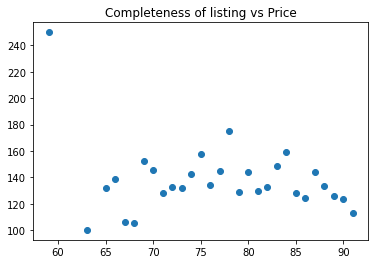

time: 203 ms (started: 2025-04-11 14:37:26 +01:00)


In [45]:
# graph price
plt.scatter(NA_price['count_NA'], NA_price['price_avg'])
plt.title("Completeness of listing vs Price")
plt.show()

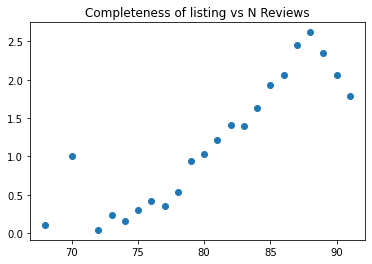

time: 282 ms (started: 2025-04-18 15:52:06 +01:00)


In [181]:
# graph n reviews
plt.scatter(NA_price['count_NA'], NA_price['reviews_per_month'])
plt.title("Completeness of listing vs N Reviews")
plt.show()

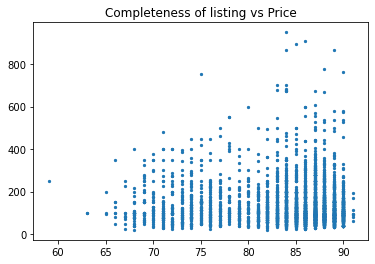

time: 484 ms (started: 2025-04-18 09:26:14 +01:00)


In [24]:
# graph price
plt.scatter(listings3['count_NA'], listings3['price_avg'], s=5)
plt.title("Completeness of listing vs Price")
plt.show()

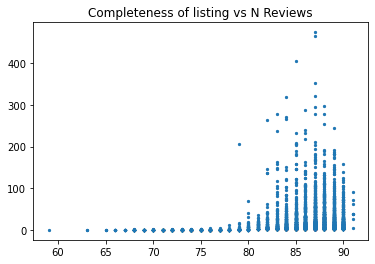

time: 156 ms (started: 2025-04-18 09:26:18 +01:00)


In [25]:
# graph number of reviews
plt.scatter(listings3['count_NA'], listings3['number_of_reviews'], s=5)
plt.title("Completeness of listing vs N Reviews")
plt.show()

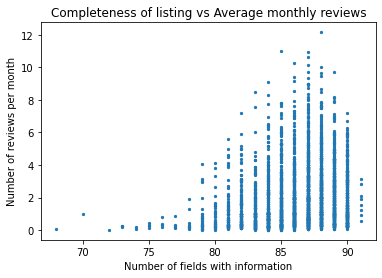

time: 469 ms (started: 2025-04-18 15:56:39 +01:00)


In [186]:
# graph number of reviews
plt.scatter(listings3['count_NA'], listings3['reviews_per_month'], s=5)
plt.title("Completeness of listing vs Average monthly reviews")
plt.xlabel("Number of fields with information")
plt.ylabel("Number of reviews per month")
plt.show()

There seems to be no correlation between completeness of listing vs price. 

But what if we removed cases where n is low? 

In [187]:
# what is the range of n like?
print(NA_price['n'].min())
print(NA_price['n'].quantile(q=0.25))
print(NA_price['n'].mean())
print(NA_price['n'].quantile(q=0.75))
print(NA_price['n'].max())

1
38.0
131.6551724137931
168.0
564
time: 109 ms (started: 2025-04-18 16:03:54 +01:00)


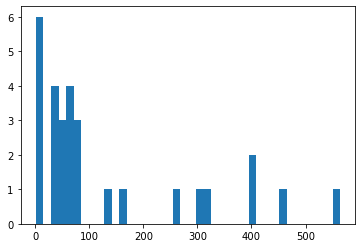

time: 313 ms (started: 2025-04-18 16:04:06 +01:00)


In [188]:
# graph this to determine our cutoff points
plt.hist(NA_price['n'], bins=40)
plt.show()

In [189]:
NA_price.loc[NA_price['n']<50]

,count_NA,price_avg,number_of_reviews,reviews_per_month,n
0,59,250.000000,0.000000,NaN,1
1,63,100.264045,0.000000,NaN,2
2,65,131.666667,0.000000,NaN,3
3,66,138.625000,0.000000,NaN,8
4,67,106.100000,0.000000,NaN,10
5,68,105.445109,0.026316,0.1000,38
6,69,152.670695,0.000000,NaN,34
7,70,145.984048,0.026316,1.0000,38
15,78,175.364147,0.634146,0.5300,41
28,91,113.022749,45.750000,1.7825,8


time: 109 ms (started: 2025-04-18 16:04:12 +01:00)


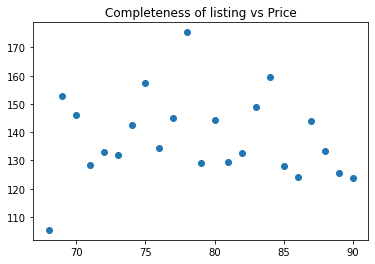

time: 188 ms (started: 2025-04-11 15:08:36 +01:00)


In [68]:
# subset to n>30 and replot
NA_price_50plus = NA_price.loc[NA_price['n']>30]

plt.scatter(NA_price_50plus['count_NA'], NA_price_50plus['price_avg'])
plt.title("Completeness of listing vs Price")
plt.show()

In [69]:
NA_price_50plus.corr()

,count_NA,price_avg,n
count_NA,1.000000,-0.071919,0.823932
price_avg,-0.071919,1.000000,-0.173676
n,0.823932,-0.173676,1.000000


time: 0 ns (started: 2025-04-11 15:08:59 +01:00)


Still very weak correlation despite removing lower cases of n

Repeat but try using only some columns which customers may care about if information is missing - classify these subsets

In [17]:
# create groupings of diff vars which reflect aspects customers may care about
# 6 groups in total: description, images, hostinfo, reviewinfo, locationinfo, propertyinfo

col_list_description = ['summary_NA', 'space_NA', 'neighborhood_overview_NA', 'notes_NA', 'transit_NA']
col_list_images = ['thumbnail_url_NA', 'picture_url_NA', 'xl_picture_url_NA']
col_list_hostinfo = ['host_id_NA',
 'host_url_NA',
 'host_name_NA',
 'host_since_NA',
 'host_location_NA',
 'host_about_NA',
 'host_response_time_NA',
 'host_response_rate_NA',
 'host_acceptance_rate_NA',
 'host_is_superhost_NA',
 'host_thumbnail_url_NA',
 'host_picture_url_NA',
 'host_neighbourhood_NA',
 'host_listings_count_NA',
 'host_total_listings_count_NA',
 'host_verifications_NA',
 'host_has_profile_pic_NA',
 'host_identity_verified_NA']
col_list_reviewinfo = [ 'first_review_NA',
 'last_review_NA',
 'review_scores_rating_NA',
 'review_scores_accuracy_NA',
 'review_scores_cleanliness_NA',
 'review_scores_checkin_NA',
 'review_scores_communication_NA',
 'review_scores_location_NA',
 'review_scores_value_NA']
col_list_locationinfo = ['neighbourhood_group_cleansed_NA',
 'city_NA',
 'state_NA',
 'zipcode_NA',
 'latitude_NA',
 'longitude_NA',
 'is_location_exact_NA',
 'street_NA']
col_list_propertyinfo = ['property_type_NA',
 'room_type_NA',
 'accommodates_NA',
 'bathrooms_NA',
 'bedrooms_NA',
 'beds_NA',
 'bed_type_NA',
 'amenities_NA',
 'square_feet_NA']


time: 0 ns (started: 2025-04-21 10:25:46 +01:00)


In [18]:
listings_NA_grp = pd.DataFrame(listings_NA['listing_id'])
listings_NA_grp.head()

,listing_id
0,241032
1,953595
2,3308979
3,7421966
4,278830


time: 16 ms (started: 2025-04-21 10:25:47 +01:00)


In [31]:
col_list_category = [col_list_description, col_list_images, col_list_hostinfo, col_list_reviewinfo, col_list_locationinfo, col_list_propertyinfo]
category_names = ['description', 'images', 'hostinfo', 'reviewinfo', 'locationinfo', 'propertyinfo']

time: 0 ns (started: 2025-04-21 10:27:36 +01:00)


In [34]:
for x in range(len(col_list_category)):
    create_NA_group(col_list_category[x], category_names[x])

time: 16 ms (started: 2025-04-21 10:27:42 +01:00)


In [35]:
listings_NA_grp.head()

,listing_id,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,1,1,18,9,8,8
1,953595,5,3,18,9,8,8
2,3308979,5,1,18,9,8,8
3,7421966,1,1,14,0,8,8
4,278830,5,1,17,9,8,8


time: 15 ms (started: 2025-04-21 10:27:43 +01:00)


In [77]:
# merge back onto price to get mean prices
listings_NA_grp_price = pd.merge(listings2[['listing_id', 'price_avg', 'price', 'number_of_reviews','reviews_per_month']], listings_NA_grp, on='listing_id', how='left')
listings_NA_grp_price.head()


,listing_id,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,$85.00,207,4.07,1,1,18,9,8,8
1,953595,170.931271,$150.00,43,1.48,5,3,18,9,8,8
2,3308979,894.186047,$975.00,20,1.15,5,1,18,9,8,8
3,7421966,100.000000,$100.00,0,NaN,1,1,14,0,8,8
4,278830,462.739726,$450.00,38,0.89,5,1,17,9,8,8


time: 16 ms (started: 2025-04-21 11:38:39 +01:00)


In [79]:
# clean price and imput 0s in reviews_per month

# remove $ in price
listings_NA_grp_price['price'] = pd.to_numeric(listings_NA_grp_price['price'].str.replace('$', ''), errors='coerce')

# impute 0's in reviews_per_month
listings_NA_grp_price['reviews_per_month'].fillna(0, inplace=True) 

time: 16 ms (started: 2025-04-21 11:41:52 +01:00)


<ipython-input-79-e9c667c52025>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  listings_NA_grp_price['price'] = pd.to_numeric(listings_NA_grp_price['price'].str.replace('$', ''), errors='coerce')


In [80]:
listings_NA_grp_price.head()

,listing_id,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,85.0,207,4.07,1,1,18,9,8,8
1,953595,170.931271,150.0,43,1.48,5,3,18,9,8,8
2,3308979,894.186047,975.0,20,1.15,5,1,18,9,8,8
3,7421966,100.000000,100.0,0,0.00,1,1,14,0,8,8
4,278830,462.739726,450.0,38,0.89,5,1,17,9,8,8


time: 16 ms (started: 2025-04-21 11:42:04 +01:00)


In [81]:
# whats the correlation? (Pearson)
listings_NA_grp_price.corr()

,listing_id,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
listing_id,1.000000,-0.058661,-0.046239,-0.506105,-0.095897,-0.084761,0.007482,-0.195049,-0.402526,0.019492,-0.167868
price_avg,-0.058661,1.000000,0.946499,-0.110144,-0.174275,-0.031625,-0.169208,-0.044693,-0.008493,-0.014371,0.036156
price,-0.046239,0.946499,1.000000,-0.124812,-0.190477,-0.033425,-0.179645,-0.092328,-0.027030,-0.016127,0.032483
number_of_reviews,-0.506105,-0.110144,-0.124812,1.000000,0.601509,0.108718,0.051698,0.244004,0.267432,-0.009159,0.069052
reviews_per_month,-0.095897,-0.174275,-0.190477,0.601509,1.000000,0.238994,0.087779,0.324661,0.426703,-0.010967,-0.016370
count_NA_description,-0.084761,-0.031625,-0.033425,0.108718,0.238994,1.000000,0.041119,0.202413,0.253918,0.004573,0.029641
count_NA_images,0.007482,-0.169208,-0.179645,0.051698,0.087779,0.041119,1.000000,0.027798,0.019751,0.031226,-0.004789
count_NA_hostinfo,-0.195049,-0.044693,-0.092328,0.244004,0.324661,0.202413,0.027798,1.000000,0.342083,0.026568,0.019546
count_NA_reviewinfo,-0.402526,-0.008493,-0.027030,0.267432,0.426703,0.253918,0.019751,0.342083,1.000000,-0.003085,0.050410
count_NA_locationinfo,0.019492,-0.014371,-0.016127,-0.009159,-0.010967,0.004573,0.031226,0.026568,-0.003085,1.000000,-0.030476


time: 31 ms (started: 2025-04-21 11:42:12 +01:00)


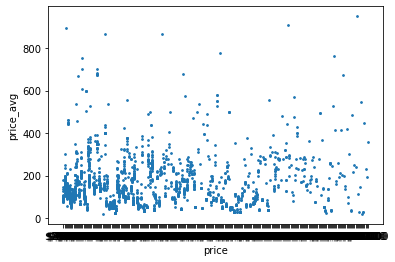

time: 5.42 s (started: 2025-04-21 11:42:50 +01:00)


In [83]:
#check completeness between price and price_avg and decide which variable to use
plt.scatter(listings2['price'], listings2['price_avg'], s=3)
# plt.title("Price vs Reviews per month")
plt.xlabel("price")
plt.ylabel("price_avg")
plt.show() 

# looks like they're very much not the same at all??

# Use price instead

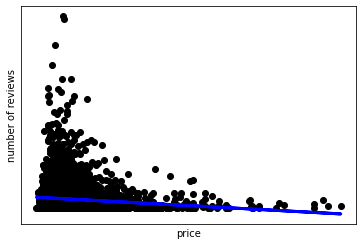

time: 141 ms (started: 2025-04-21 17:46:45 +01:00)


In [127]:
listings_NA_grp_price.dropna(inplace = True) 

# if listings had the same characteristics, how much does completeness of info impact price/number of reviews?
X = listings_NA_grp_price[['price_avg']]
y = listings_NA_grp_price[['number_of_reviews']]

# X = X.reshape(length, 1)
# y = y.reshape(length, 1)

regr = sk.linear_model.LinearRegression()
regr.fit(X, y)

# print(regr.score(X,y))

plt.scatter(X, y,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.xlabel('price')
plt.ylabel('number of reviews')
plt.show()

In [103]:
#drop the 1 null row 

listings_NA_grp_price = listings_NA_grp_price.dropna(subset=['price'])

time: 0 ns (started: 2025-04-21 12:21:53 +01:00)


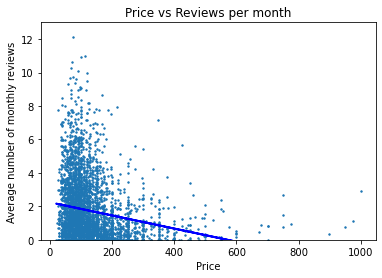

time: 219 ms (started: 2025-04-21 12:28:21 +01:00)


In [106]:
# Graph price against reviews per month
X = listings_NA_grp_price[['price']]
y = listings_NA_grp_price[['reviews_per_month']]

regr = sk.linear_model.LinearRegression()
regr.fit(X, y)

plt.scatter(X, y, s=2)

plt.plot(X, regr.predict(X), color='blue', linewidth=2)
plt.ylim([0, 13])
plt.title("Price vs Reviews per month")
plt.xlabel("Price")
plt.ylabel("Average number of monthly reviews")
plt.show()

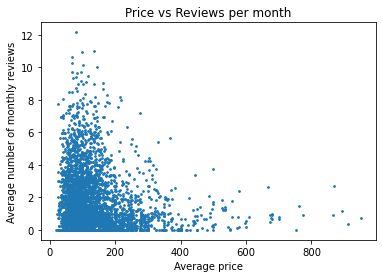

time: 187 ms (started: 2025-04-21 11:43:23 +01:00)


In [85]:
plt.scatter(listings_NA_grp_price['price_avg'], listings_NA_grp_price['reviews_per_month'], s=3)
plt.title("Price vs Reviews per month")
plt.xlabel("Average price")
plt.ylabel("Average number of monthly reviews")
plt.show()

<AxesSubplot:xlabel='price_avg', ylabel='number_of_reviews'>

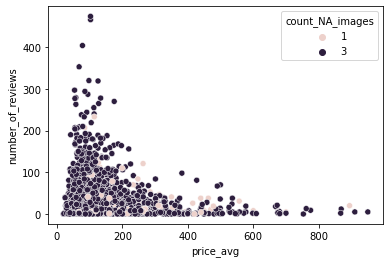

time: 687 ms (started: 2025-04-21 10:27:59 +01:00)


In [38]:
sns.scatterplot(data=listings_NA_grp_price, x="price_avg", y="number_of_reviews", hue="count_NA_images")

<AxesSubplot:xlabel='price_avg', ylabel='number_of_reviews'>

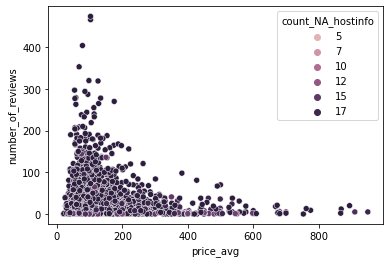

time: 672 ms (started: 2025-04-14 18:12:35 +01:00)


In [47]:
sns.scatterplot(data=listings_NA_grp_price, x="price_avg", y="number_of_reviews", hue="count_NA_hostinfo")

<AxesSubplot:xlabel='count_NA_description', ylabel='number_of_reviews'>

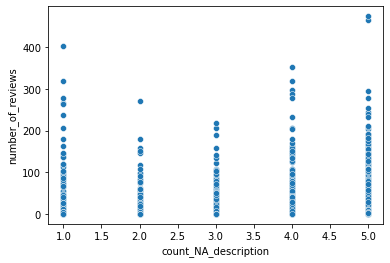

time: 219 ms (started: 2025-04-14 18:25:58 +01:00)


In [52]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_description", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_images', ylabel='number_of_reviews'>

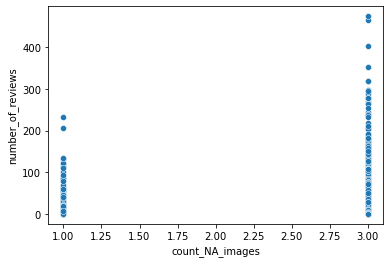

time: 203 ms (started: 2025-04-14 18:23:00 +01:00)


In [49]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_images", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_hostinfo', ylabel='number_of_reviews'>

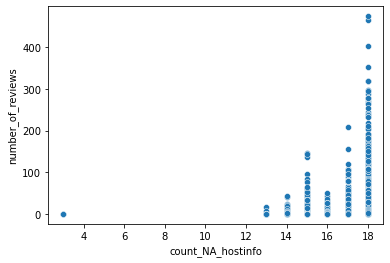

time: 204 ms (started: 2025-04-14 18:13:53 +01:00)


In [48]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_hostinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_hostinfo', ylabel='reviews_per_month'>

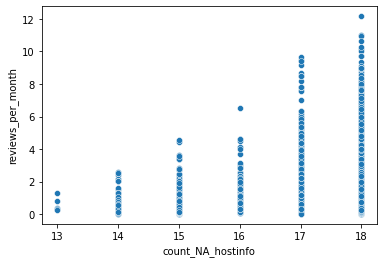

time: 313 ms (started: 2025-04-18 16:39:58 +01:00)


In [193]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_hostinfo", y="reviews_per_month")

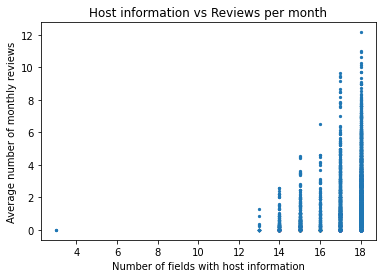

time: 234 ms (started: 2025-04-21 10:56:28 +01:00)


In [53]:
plt.scatter(listings_NA_grp_price['count_NA_hostinfo'], listings_NA_grp_price['reviews_per_month'], s=5)
plt.title("Host information vs Reviews per month")
plt.xlabel("Number of fields with host information")
plt.ylabel("Average number of monthly reviews")
plt.show()

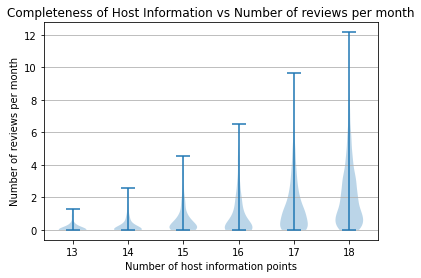

time: 391 ms (started: 2025-04-21 11:19:29 +01:00)


In [58]:
#Violin plot against reviews per month
fig, axes = plt.subplots()

axes.violinplot(dataset = [listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 13]["reviews_per_month"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 14]["reviews_per_month"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 15]["reviews_per_month"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 16]["reviews_per_month"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 17]["reviews_per_month"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 18]["reviews_per_month"].values ] )

axes.set_title('Completeness of Host Information vs Number of reviews per month')
axes.yaxis.grid(True)
axes.set_xlabel('Number of host information points')
axes.set_ylabel('Number of reviews per month')

# Set x-ticks and labels
axes.set_xticks(range(1, 7))  # Set the positions of the ticks (1 to 6 for 6 groups)
axes.set_xticklabels([13, 14, 15, 16, 17, 18])  # Set the corresponding labels


plt.show()

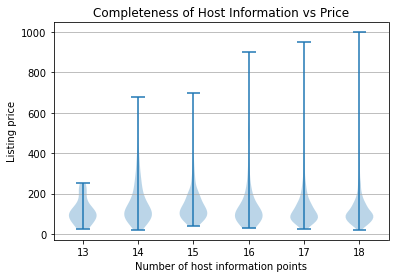

time: 203 ms (started: 2025-04-21 16:05:25 +01:00)


In [125]:
# Violin plot against price
fig, axes = plt.subplots()

axes.violinplot(dataset = [listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 13]["price"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 14]["price"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 15]["price"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 16]["price"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 17]["price"].values,
                           listings_NA_grp_price[listings_NA_grp_price.count_NA_hostinfo == 18]["price"].values ] )

axes.set_title('Completeness of Host Information vs Price')
axes.yaxis.grid(True)
axes.set_xlabel('Number of host information points')
axes.set_ylabel('Listing price')

# Set x-ticks and labels
axes.set_xticks(range(1, 7))  # Set the positions of the ticks (1 to 6 for 6 groups)
axes.set_xticklabels([13, 14, 15, 16, 17, 18])  # Set the corresponding labels


plt.show()

In [43]:
print(listings_NA_grp_price.isnull().sum())  # Check for NaN values in each column

listing_id                 0
price_avg                 96
number_of_reviews          0
reviews_per_month        627
count_NA_description       0
count_NA_images            0
count_NA_hostinfo          0
count_NA_reviewinfo        0
count_NA_locationinfo      0
count_NA_propertyinfo      0
dtype: int64
time: 16 ms (started: 2025-04-21 10:47:10 +01:00)


In [91]:
#see what the null reviews per month looks like
listings_NA_grp_price[listings_NA_grp_price['reviews_per_month'].isnull()]


,listing_id,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo


time: 0 ns (started: 2025-04-21 11:47:32 +01:00)


In [48]:
#impute where 'reviews_per_month' is null with 0's, since the number of reviews is 0
listings_NA_grp_price.fillna(0, inplace=True)  # Fill NaN values with 0 (or another value)
listings_NA_grp_price[listings_NA_grp_price['reviews_per_month'].isnull()]

,listing_id,price_avg,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo


time: 0 ns (started: 2025-04-21 10:53:13 +01:00)


In [52]:
listings_NA_grp_price['reviews_per_month']

0       4.07
1       1.48
2       1.15
3       0.00
4       0.89
        ... 
3813    0.30
3814    2.00
3815    0.00
3816    0.00
3817    0.00
Name: reviews_per_month, Length: 3818, dtype: float64

time: 0 ns (started: 2025-04-21 10:56:04 +01:00)


In [50]:
for month in range(13, 19):
    count_values = listings_NA_grp_price[listings_NA_grp_price.reviews_per_month == month]["count_NA_hostinfo"].values
    print(f"Month {month}: {len(count_values)} values")


Month 13: 0 values
Month 14: 0 values
Month 15: 0 values
Month 16: 0 values
Month 17: 0 values
Month 18: 0 values
time: 0 ns (started: 2025-04-21 10:55:16 +01:00)


<AxesSubplot:xlabel='count_NA_reviewinfo', ylabel='number_of_reviews'>

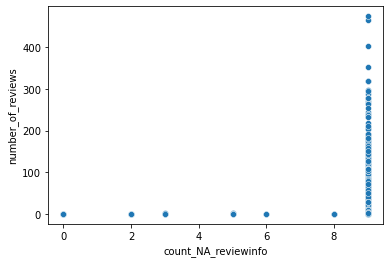

time: 172 ms (started: 2025-04-14 18:27:12 +01:00)


In [53]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_reviewinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_locationinfo', ylabel='number_of_reviews'>

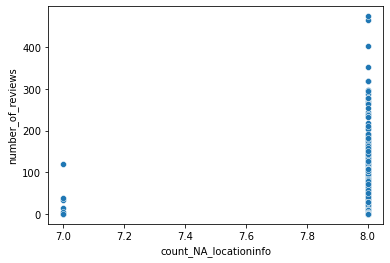

time: 172 ms (started: 2025-04-14 18:27:14 +01:00)


In [54]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_locationinfo", y="number_of_reviews")

<AxesSubplot:xlabel='count_NA_propertyinfo', ylabel='number_of_reviews'>

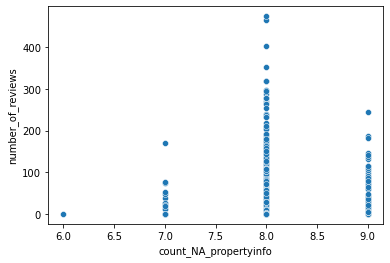

time: 188 ms (started: 2025-04-14 18:27:16 +01:00)


In [55]:
sns.scatterplot(data=listings_NA_grp_price, x="count_NA_propertyinfo", y="number_of_reviews")

In [36]:
listings_NA_grp_price.head()

,listing_id,price_avg,number_of_reviews,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,207,1,1,18,9,8,8
1,953595,170.931271,43,5,3,18,9,8,8
2,3308979,894.186047,20,5,1,18,9,8,8
3,7421966,100.000000,0,1,1,14,0,8,8
4,278830,462.739726,38,5,1,17,9,8,8


time: 0 ns (started: 2025-04-18 09:38:23 +01:00)


In [118]:
listings_NA_grp_price.head()

,listing_id,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,85.000000,85.0,207,4.07,1,1,18,9,8,8
1,953595,170.931271,150.0,43,1.48,5,3,18,9,8,8
2,3308979,894.186047,975.0,20,1.15,5,1,18,9,8,8
3,7421966,100.000000,100.0,0,0.00,1,1,14,0,8,8
4,278830,462.739726,450.0,38,0.89,5,1,17,9,8,8


time: 15 ms (started: 2025-04-21 15:57:14 +01:00)


In [114]:
# merge NA_grp data with main listings table
listings_main = pd.merge(listings2[['listing_id', 
#                                     'price_avg', 'number_of_reviews', 'reviews_per_month',
                                    'review_scores_rating','property_type',
                                    'room_type','accommodates','cancellation_policy',
                                    'neighbourhood_group_cleansed']], 
                         listings_NA_grp_price, on='listing_id', how='left')
listings_main.head()

,listing_id,review_scores_rating,property_type,room_type,accommodates,cancellation_policy,neighbourhood_group_cleansed,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,count_NA_locationinfo,count_NA_propertyinfo
0,241032,95.0,Apartment,Entire home/apt,4,moderate,Queen Anne,85.000000,85.0,207.0,4.07,1.0,1.0,18.0,9.0,8.0,8.0
1,953595,96.0,Apartment,Entire home/apt,4,strict,Queen Anne,170.931271,150.0,43.0,1.48,5.0,3.0,18.0,9.0,8.0,8.0
2,3308979,97.0,House,Entire home/apt,11,strict,Queen Anne,894.186047,975.0,20.0,1.15,5.0,1.0,18.0,9.0,8.0,8.0
3,7421966,NaN,Apartment,Entire home/apt,3,flexible,Queen Anne,100.000000,100.0,0.0,0.00,1.0,1.0,14.0,0.0,8.0,8.0
4,278830,92.0,House,Entire home/apt,6,strict,Queen Anne,462.739726,450.0,38.0,0.89,5.0,1.0,17.0,9.0,8.0,8.0


time: 46 ms (started: 2025-04-21 15:56:10 +01:00)


In [119]:
# Dummy the categorical variables
cat_vars = listings_main.select_dtypes(include=['object']).copy().columns

# cat_vars
for var in cat_vars:
    # for each cat add dummy var, drop original column
    listings_main = pd.concat([listings_main.drop(var, axis=1), pd.get_dummies(listings_main[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

time: 31 ms (started: 2025-04-21 15:57:25 +01:00)


In [120]:
listings_main.head()

,listing_id,review_scores_rating,accommodates,price_avg,price,number_of_reviews,reviews_per_month,count_NA_description,count_NA_images,count_NA_hostinfo,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,241032,95.0,4,85.000000,85.0,207.0,4.07,1.0,1.0,18.0,...,0,0,0,0,0,1,0,0,0,0
1,953595,96.0,4,170.931271,150.0,43.0,1.48,5.0,3.0,18.0,...,0,0,0,0,0,1,0,0,0,0
2,3308979,97.0,11,894.186047,975.0,20.0,1.15,5.0,1.0,18.0,...,0,0,0,0,0,1,0,0,0,0
3,7421966,NaN,3,100.000000,100.0,0.0,0.00,1.0,1.0,14.0,...,0,0,0,0,0,1,0,0,0,0
4,278830,92.0,6,462.739726,450.0,38.0,0.89,5.0,1.0,17.0,...,0,0,0,0,0,1,0,0,0,0


time: 15 ms (started: 2025-04-21 15:57:27 +01:00)


In [173]:
list(listings_main)

['listing_id',
 'price_avg',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_rating',
 'accommodates',
 'count_NA_description',
 'count_NA_images',
 'count_NA_hostinfo',
 'count_NA_reviewinfo',
 'count_NA_locationinfo',
 'count_NA_propertyinfo',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'room_type_Private room',
 'room_type_Shared room',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'neighbourhood_group_cleansed_Beacon Hill',
 'neighbourhood_group_cleansed_Capitol Hill',
 'neighbourhood_group_cleansed_Cascade',
 'neighbourhood_group_cleansed_Central Area',
 'neighbourhood_group_cleansed_Delridge',
 'neighbourhood_gr

time: 141 ms (started: 2025-04-18 14:26:57 +01:00)


In [174]:
### Linear Regression #1: number_of_reviews


# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg', 
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['number_of_reviews']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     11.16
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           6.71e-68
Time:                        14:27:00   Log-Likelihood:                -12986.
No. Observations:                2603   AIC:                         2.606e+04
Df Residuals:                    2559   BIC:                         2.632e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [128]:
listings_main['price_avg'].isna().sum()

96

time: 109 ms (started: 2025-04-18 13:38:07 +01:00)


In [109]:
listings_main.head()

,listing_id,price_avg,number_of_reviews,reviews_per_month,review_scores_rating,accommodates,count_NA_description,count_NA_images,count_NA_hostinfo,count_NA_reviewinfo,...,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle
0,241032,85.000000,207,4.07,95.0,4,1,1,18,9,...,0,0,0,0,0,1,0,0,0,0
1,953595,170.931271,43,1.48,96.0,4,5,3,18,9,...,0,0,0,0,0,1,0,0,0,0
2,3308979,894.186047,20,1.15,97.0,11,5,1,18,9,...,0,0,0,0,0,1,0,0,0,0
3,7421966,100.000000,0,NaN,NaN,3,1,1,14,0,...,0,0,0,0,0,1,0,0,0,0
4,278830,462.739726,38,0.89,92.0,6,5,1,17,9,...,0,0,0,0,0,1,0,0,0,0


time: 31 ms (started: 2025-04-21 15:52:33 +01:00)


In [126]:

### Linear Regression #2: use 'review_per_month' as the dependent variable instead


# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg',  #results in errors
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['reviews_per_month']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     25.98
Date:                Mon, 21 Apr 2025   Prob (F-statistic):          7.20e-168
Time:                        16:21:01   Log-Likelihood:                -4803.1
No. Observations:                2603   AIC:                             9694.
Df Residuals:                    2559   BIC:                             9952.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [159]:

### Linear Regression #3: reviews_per_month, but take out all categorical variables that don't seem to have an impact


# Assuming you have your X and y defined as before
X = listings_main[[
                    'price_avg',  #results in errors
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                ]]
y = listings_main['reviews_per_month']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:      reviews_per_month   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     44.00
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.91e-58
Time:                        14:16:54   Log-Likelihood:                -4236.2
No. Observations:                2171   AIC:                             8488.
Df Residuals:                    2163   BIC:                             8534.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -5.72

In [122]:

### Linear Regression #4: use price as dependent var instead


# Assuming you have your X and y defined as before
X = listings_main[[
                   'count_NA_description', 'count_NA_images', 'count_NA_hostinfo', 
                   'count_NA_reviewinfo', 'count_NA_locationinfo', 'count_NA_propertyinfo', 
                    'accommodates',
                    'reviews_per_month',
                    'property_type_Bed & Breakfast',
                     'property_type_Boat',
                     'property_type_Bungalow',
                     'property_type_Cabin',
                     'property_type_Camper/RV',
                     'property_type_Chalet',
                     'property_type_Condominium',
                     'property_type_Dorm',
                     'property_type_House',
                     'property_type_Loft',
                     'property_type_Other',
                     'property_type_Tent',
                     'property_type_Townhouse',
                     'property_type_Treehouse',
                     'property_type_Yurt',
                     'room_type_Private room',
                     'room_type_Shared room',
                     'cancellation_policy_moderate',
                     'cancellation_policy_strict',
                     'neighbourhood_group_cleansed_Beacon Hill',
                     'neighbourhood_group_cleansed_Capitol Hill',
                     'neighbourhood_group_cleansed_Cascade',
                     'neighbourhood_group_cleansed_Central Area',
                     'neighbourhood_group_cleansed_Delridge',
                     'neighbourhood_group_cleansed_Downtown',
                     'neighbourhood_group_cleansed_Interbay',
                     'neighbourhood_group_cleansed_Lake City',
                     'neighbourhood_group_cleansed_Magnolia',
                     'neighbourhood_group_cleansed_Northgate',
                     'neighbourhood_group_cleansed_Other neighborhoods',
                     'neighbourhood_group_cleansed_Queen Anne',
                     'neighbourhood_group_cleansed_Rainier Valley',
                     'neighbourhood_group_cleansed_Seward Park',
                     'neighbourhood_group_cleansed_University District',
                     'neighbourhood_group_cleansed_West Seattle']]
y = listings_main['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Add a constant to the model (intercept)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model=sm.OLS(y_train, X_train_sm, missing= 'drop').fit()

# Get the summary which includes p-values
summary = model.summary()
print(summary)

# To extract coefficients and p-values
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame with coefficients and p-values
results_df = pd.DataFrame({'Coefficient': coefficients, 'P-Value': p_values})

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     70.37
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:02:08   Log-Likelihood:                -14714.
No. Observations:                2671   AIC:                         2.952e+04
Df Residuals:                    2627   BIC:                         2.978e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------